In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st
import holidays

In [2]:
# Cargar los CSVs de ventas y competencia desde la carpeta data/raw/entrenamiento
ventas_df = pd.read_csv('../data/raw/entrenamiento/ventas.csv')
competencia_df = pd.read_csv('../data/raw/entrenamiento/competencia.csv')

In [3]:
# Mostrar las primeras filas de los dataframes para verificar la carga
print('Ventas:')
print(ventas_df.head())
print('\nCompetencia:')
print(competencia_df.head())

Ventas:
        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  
0        118.36    710.16  
1        136.82   1368.20  
2         84.93    169.86  
3         75.42    1

In [4]:
# Informe de calidad de datos para ventas_df
print('--- Tipos de variables ---')
print(ventas_df.dtypes)
print('\n--- Valores nulos por columna ---')
print(ventas_df.isnull().sum())
print('\n--- Duplicados ---')
print('Duplicados totales:', ventas_df.duplicated().sum())
print('\n--- Estadísticas descriptivas ---')
print(ventas_df.describe(include='all'))

--- Tipos de variables ---
fecha                 object
producto_id           object
nombre                object
categoria             object
subcategoria          object
precio_base            int64
es_estrella             bool
unidades_vendidas      int64
precio_venta         float64
ingresos             float64
dtype: object

--- Valores nulos por columna ---
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64

--- Duplicados ---
Duplicados totales: 0

--- Estadísticas descriptivas ---
             fecha producto_id                    nombre categoria  \
count         3552        3552                      3552      3552   
unique         148          24                        24         4   
top     2021-10-25    PROD_001  Nike Air Zoom Pegasus 40   Running   
freq            24         148    

In [5]:
# Informe de calidad de datos para competencia_df
print('--- Tipos de variables ---')
print(competencia_df.dtypes)
print('\n--- Valores nulos por columna ---')
print(competencia_df.isnull().sum())
print('\n--- Duplicados ---')
print('Duplicados totales:', competencia_df.duplicated().sum())
print('\n--- Estadísticas descriptivas ---')
print(competencia_df.describe(include='all'))

--- Tipos de variables ---
fecha            object
producto_id      object
Amazon          float64
Decathlon       float64
Deporvillage    float64
dtype: object

--- Valores nulos por columna ---
fecha           0
producto_id     0
Amazon          0
Decathlon       0
Deporvillage    0
dtype: int64

--- Duplicados ---
Duplicados totales: 0

--- Estadísticas descriptivas ---
             fecha producto_id       Amazon    Decathlon  Deporvillage
count         3552        3552  3552.000000  3552.000000   3552.000000
unique         148          24          NaN          NaN           NaN
top     2021-10-25    PROD_001          NaN          NaN           NaN
freq            24         148          NaN          NaN           NaN
mean           NaN         NaN   118.623407   111.412182    118.894628
std            NaN         NaN   156.095628   148.508132    160.216448
min            NaN         NaN    16.850000    15.450000     16.770000
25%            NaN         NaN    47.117500    43.285000

In [6]:
# Convertir la columna 'fecha' a tipo datetime en ambos dataframes
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'])
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'])

In [7]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB


In [8]:
competencia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3552 non-null   datetime64[ns]
 1   producto_id   3552 non-null   object        
 2   Amazon        3552 non-null   float64       
 3   Decathlon     3552 non-null   float64       
 4   Deporvillage  3552 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 138.9+ KB


In [9]:
# Integrar ventas_df y competencia_df en un nuevo dataframe df usando fecha y producto_id como claves

df = pd.merge(ventas_df, competencia_df, on=['fecha', 'producto_id'], suffixes=('_ventas', '_competencia'))
print(df.head())

       fecha producto_id                            nombre categoria  \
0 2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1 2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2 2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3 2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4 2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  Amazon  Decathlon  Deporvillage  
0        118.36    710.16   82.96     111.88         97.43  
1        136.82   1368.2

In [10]:
df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


## Análisis exploratorio completo de `df`

A continuación se presentan diferentes análisis y visualizaciones para entender el comportamiento de las ventas y la competencia.

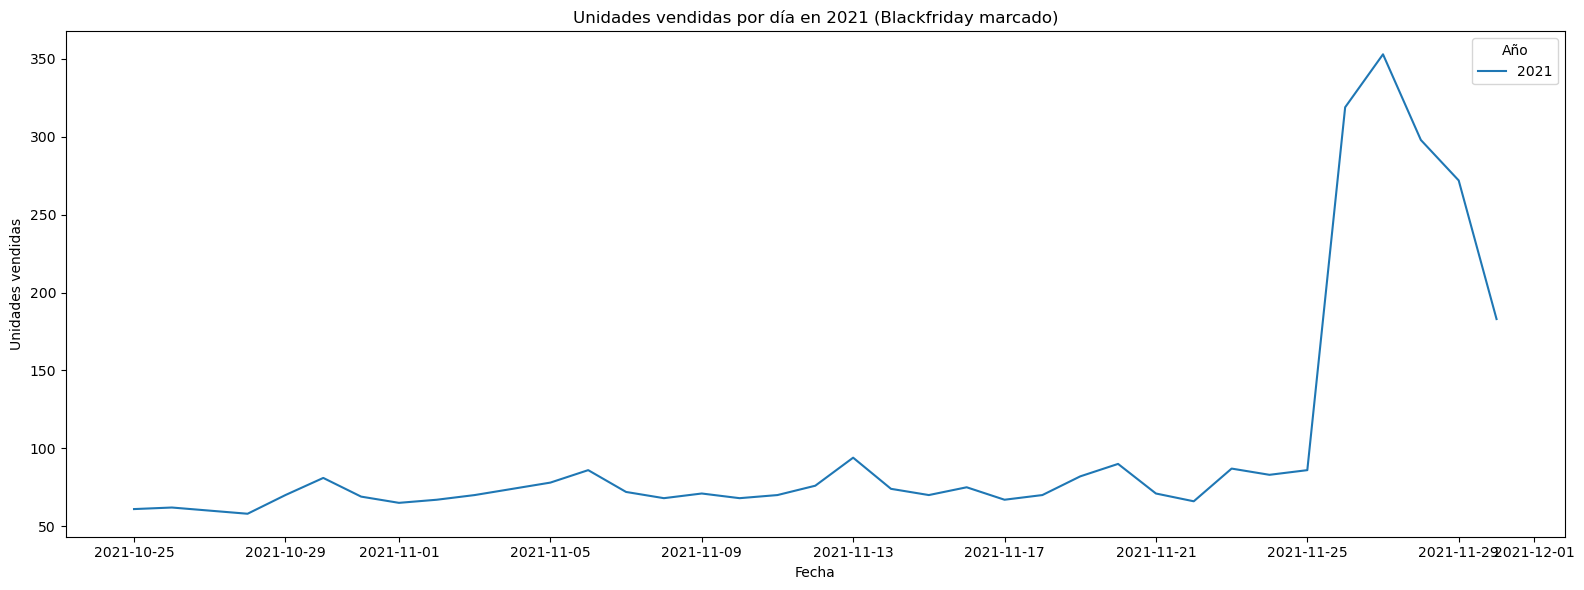

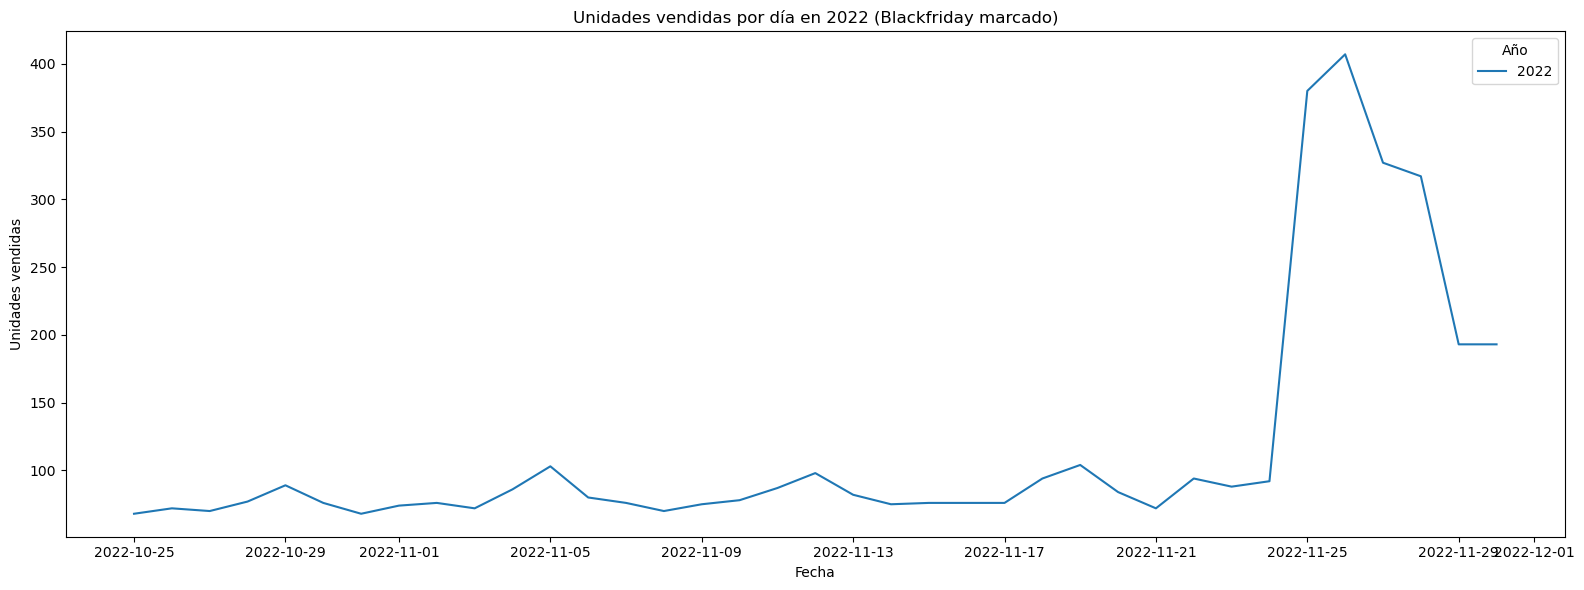

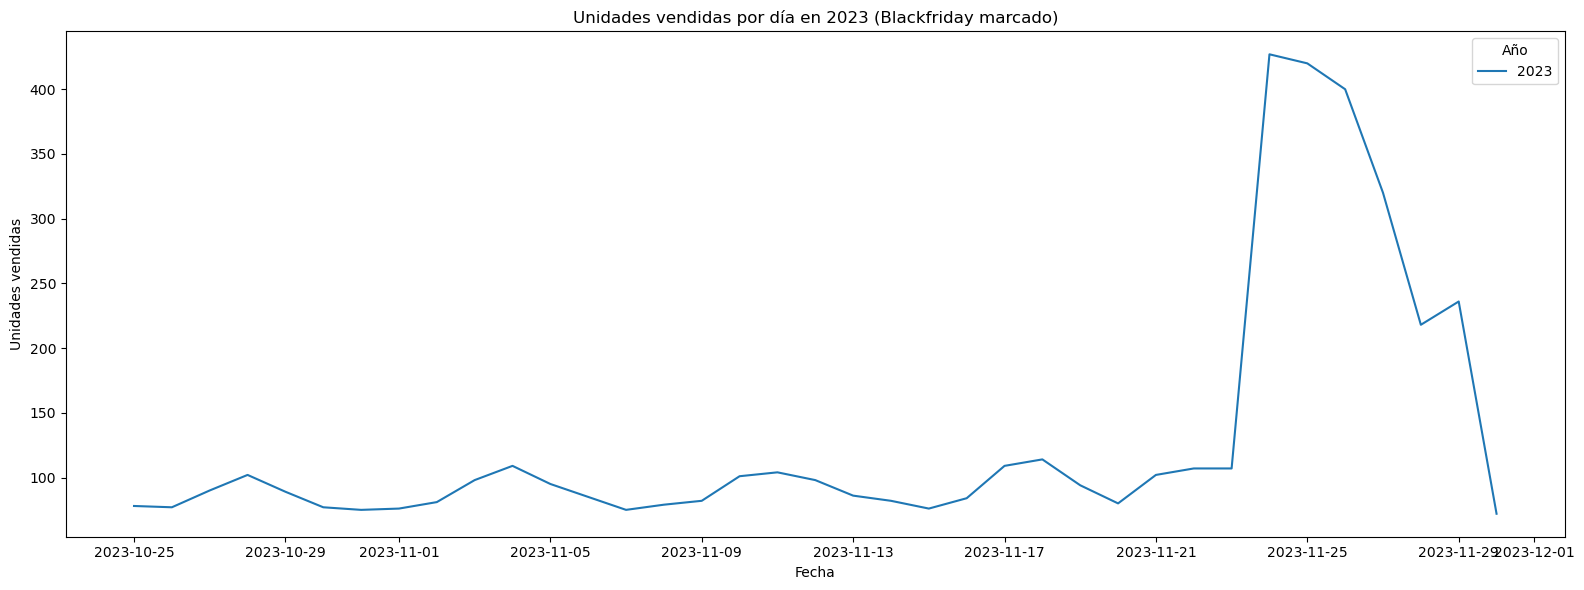

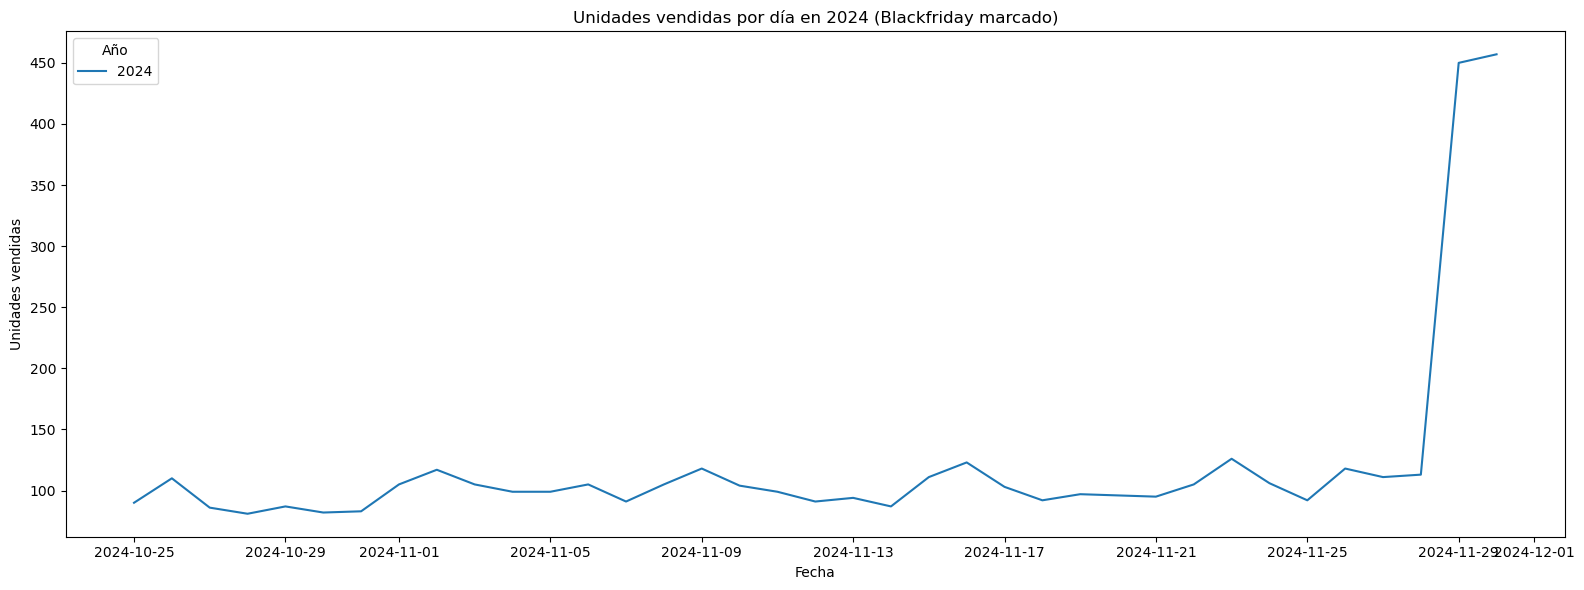

In [11]:
# Gráficos de líneas temporales por año de la suma de unidades vendidas, marcando Blackfridays
import holidays
from matplotlib.dates import DateFormatter

# Asegurarse de que df está definido y actualizado
try:
    df
except NameError:
    df = pd.merge(ventas_df, competencia_df, on=['fecha', 'producto_id'], suffixes=('_ventas', '_competencia'))

years = df['fecha'].dt.year.unique()
es_holidays = holidays.country_holidays('ES', years=years)
for year in sorted(years):
    plt.figure(figsize=(16, 6))
    df_year = df[df['fecha'].dt.year == year]
    daily_sales = df_year.groupby('fecha')['unidades_vendidas'].sum().reset_index()
    ax = sns.lineplot(data=daily_sales, x='fecha', y='unidades_vendidas', label=str(year))
    # Marcar Blackfriday
    bf = [d for d in es_holidays if 'Black Friday' in es_holidays[d] and d.year == year]
    for bf_date in bf:
        plt.axvline(bf_date, color='red', linestyle='--', alpha=0.7)
    plt.title(f'Unidades vendidas por día en {year} (Blackfriday marcado)')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades vendidas')
    plt.legend(title='Año')
    plt.tight_layout()
    plt.show()

### Suma de unidades vendidas por día de la semana

C:\Users\PC\AppData\Local\Temp\ipykernel_13268\853005487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('dia_semana')['unidades_vendidas'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index(),


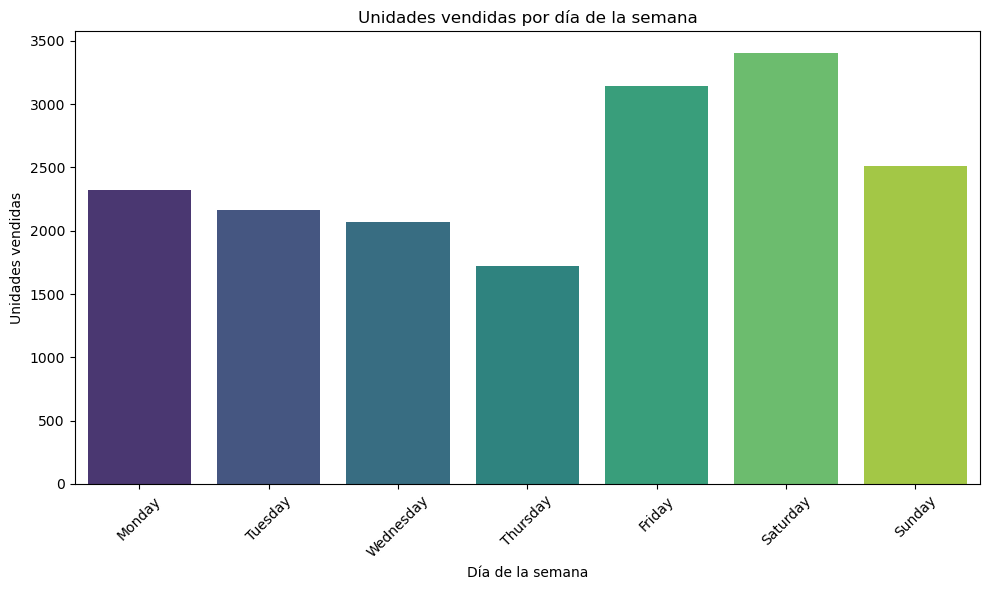

In [12]:
# Gráfico de suma de unidades vendidas por día de la semana
df['dia_semana'] = df['fecha'].dt.day_name()
plt.figure(figsize=(10,6))
sns.barplot(data=df.groupby('dia_semana')['unidades_vendidas'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index(),
            x='dia_semana', y='unidades_vendidas', palette='viridis')
plt.title('Unidades vendidas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Suma de unidades vendidas por categoría

C:\Users\PC\AppData\Local\Temp\ipykernel_13268\2163074887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data_cat, x='categoria', y='unidades_vendidas', palette='crest')


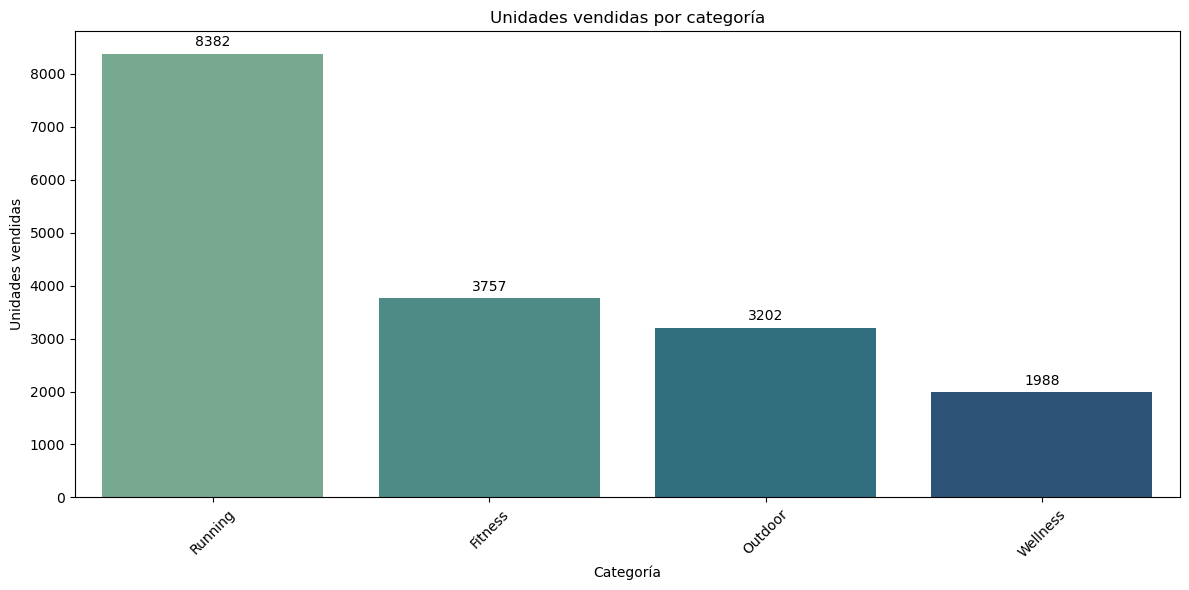

In [13]:
# Gráfico de suma de unidades vendidas por categoría con etiquetas de datos
plt.figure(figsize=(12,6))
data_cat = df.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(data=data_cat, x='categoria', y='unidades_vendidas', palette='crest')
plt.title('Unidades vendidas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
for i, v in enumerate(data_cat['unidades_vendidas']):
    ax.text(i, v + max(data_cat['unidades_vendidas']) * 0.01, str(v), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### Suma de unidades vendidas por subcategoría

C:\Users\PC\AppData\Local\Temp\ipykernel_13268\506703123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index(),


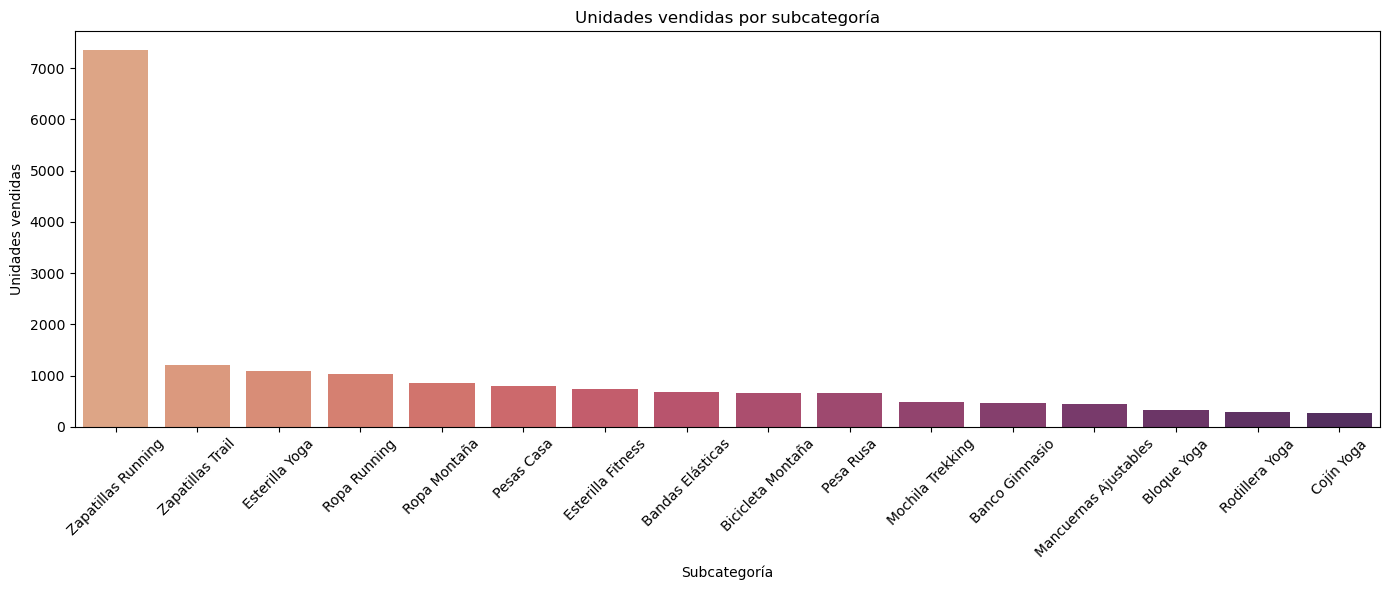

In [14]:
# Gráfico de suma de unidades vendidas por subcategoría
plt.figure(figsize=(14,6))
sns.barplot(data=df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index(),
            x='subcategoria', y='unidades_vendidas', palette='flare')
plt.title('Unidades vendidas por subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Suma de unidades vendidas por los productos top

C:\Users\PC\AppData\Local\Temp\ipykernel_13268\3838916902.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_productos, x='nombre', y='unidades_vendidas', palette='mako')


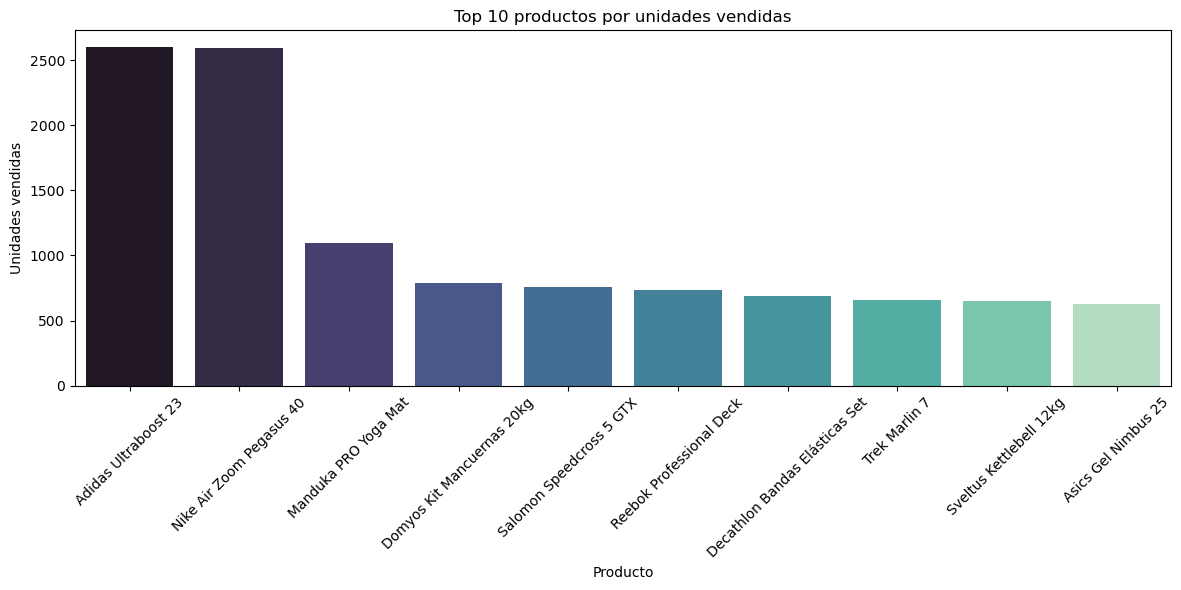

In [15]:
# Gráfico de suma de unidades vendidas por los productos top
top_n = 10
top_productos = df.groupby('nombre')['unidades_vendidas'].sum().sort_values(ascending=False).head(top_n).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=top_productos, x='nombre', y='unidades_vendidas', palette='mako')
plt.title(f'Top {top_n} productos por unidades vendidas')
plt.xlabel('Producto')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Densidad de distribución de precios: nuestros vs Amazon

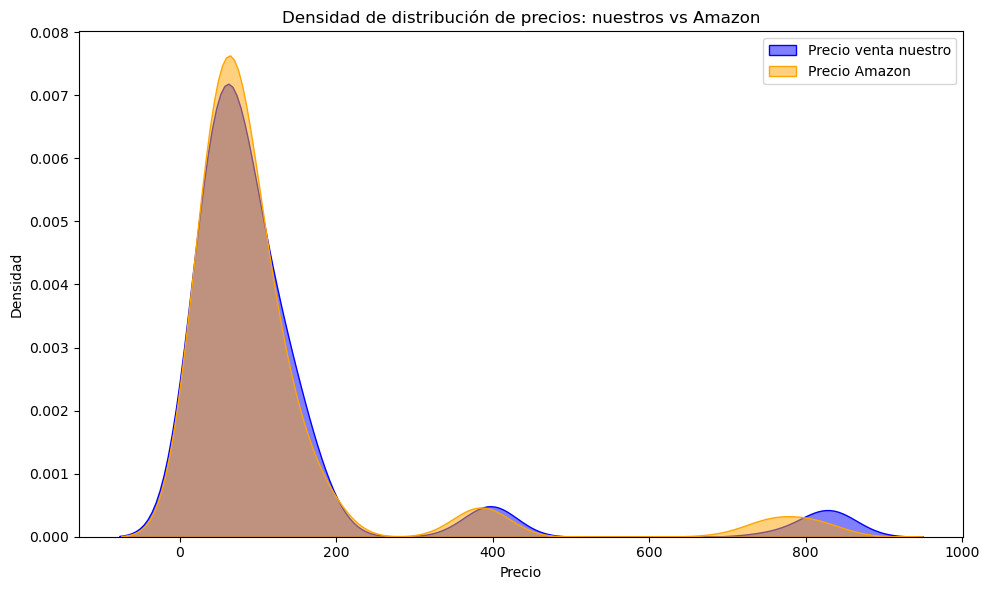

In [16]:
# Gráfico de densidad de distribución de precios: nuestros vs Amazon
plt.figure(figsize=(10,6))
sns.kdeplot(df['precio_venta'], label='Precio venta nuestro', fill=True, color='blue', alpha=0.5)
sns.kdeplot(df['Amazon'], label='Precio Amazon', fill=True, color='orange', alpha=0.5)
plt.title('Densidad de distribución de precios: nuestros vs Amazon')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Creación de variables temporales y de calendario usando holidays para España
import holidays

# Asegurarse de que df está definido y actualizado
try:
    df
except NameError:
    df = pd.merge(ventas_df, competencia_df, on=['fecha', 'producto_id'], suffixes=('_ventas', '_competencia'))

# Variables temporales básicas
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['mes_nombre'] = df['fecha'].dt.month_name()
df['dia'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
df['nombre_dia_semana'] = df['fecha'].dt.day_name()
df['fin_de_semana'] = df['dia_semana'].isin([5, 6])

# Festivos en España
years = df['año'].unique()
es_holidays = holidays.country_holidays('ES', years=years)
df['es_festivo'] = df['fecha'].isin(es_holidays)
df['nombre_festivo'] = df['fecha'].map(lambda x: es_holidays.get(x, None))

# Black Friday (último viernes de noviembre)
def es_blackfriday(fecha):
    if fecha.month == 11 and fecha.weekday() == 4:
        # Último viernes de noviembre
        next_friday = fecha + pd.Timedelta(days=7)
        return next_friday.month != 11
    return False
df['es_blackfriday'] = df['fecha'].apply(es_blackfriday)

# Cyber Monday (primer lunes después de Black Friday)
def es_cybermonday(fecha):
    if fecha.month == 11 and fecha.weekday() == 0:
        # Primer lunes después del último viernes de noviembre
        bf = max([d for d in df['fecha'] if es_blackfriday(d) and d.year == fecha.year])
        return fecha > bf and (fecha - bf).days <= 3
    return False
df['es_cybermonday'] = df['fecha'].apply(es_cybermonday)

# Variable: día laborable (no festivo y no fin de semana)
df['es_laborable'] = (~df['es_festivo']) & (~df['fin_de_semana'])

# Variable: semana del año
df['semana_año'] = df['fecha'].dt.isocalendar().week

# Variable: trimestre
df['trimestre'] = df['fecha'].dt.quarter

# Variable: inicio/fin de mes
df['inicio_mes'] = df['dia'] <= 3
df['fin_mes'] = df['dia'] >= (df['fecha'] + pd.offsets.MonthEnd(0)).dt.day - 2

# Mostrar las primeras filas con las nuevas variables
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_13268\3427382318.py:22: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['es_festivo'] = df['fecha'].isin(es_holidays)


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,fin_de_semana,es_festivo,nombre_festivo,es_blackfriday,es_cybermonday,es_laborable,semana_año,trimestre,inicio_mes,fin_mes
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,...,False,False,None,False,False,True,43,4,False,False
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,...,False,False,None,False,False,True,43,4,False,False
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,...,False,False,None,False,False,True,43,4,False,False
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,...,False,False,None,False,False,True,43,4,False,False
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,...,False,False,None,False,False,True,43,4,False,False


In [18]:
df.shape

(3552, 29)

In [19]:
# Creación de variables de Lags y media móvil de 7 días para unidades vendidas, por año
lags = range(1, 8)

def crear_lags_media(df):
    df = df.sort_values('fecha')
    for lag in lags:
        df[f'unidades_vendidas_lag{lag}'] = df['unidades_vendidas'].shift(lag)
    df['unidades_vendidas_mm7'] = df['unidades_vendidas'].rolling(window=7).mean()
    return df

# Aplicar por año para cada producto
lag_dfs = []
for (producto_id, año), grupo in df.groupby(['producto_id', 'año']):
    lag_dfs.append(crear_lags_media(grupo))
df_lags = pd.concat(lag_dfs)

# Eliminar registros con nulos en las nuevas variables de lag o media móvil
cols_lag_mm = [f'unidades_vendidas_lag{i}' for i in lags] + ['unidades_vendidas_mm7']
df_lags = df_lags.dropna(subset=cols_lag_mm)

# Mostrar las primeras filas con los lags y media móvil
print(df_lags[["fecha", "producto_id", "unidades_vendidas"] + cols_lag_mm].head())

         fecha producto_id  unidades_vendidas  unidades_vendidas_lag1  \
168 2021-11-01    PROD_001                  7                     9.0   
192 2021-11-02    PROD_001                 10                     7.0   
216 2021-11-03    PROD_001                 11                    10.0   
240 2021-11-04    PROD_001                 12                    11.0   
264 2021-11-05    PROD_001                 10                    12.0   

     unidades_vendidas_lag2  unidades_vendidas_lag3  unidades_vendidas_lag4  \
168                    12.0                    12.0                     7.0   
192                     9.0                    12.0                    12.0   
216                     7.0                     9.0                    12.0   
240                    10.0                     7.0                     9.0   
264                    11.0                    10.0                     7.0   

     unidades_vendidas_lag5  unidades_vendidas_lag6  unidades_vendidas_lag7  \
168    

In [20]:
# Crear variable de descuento porcentaje
# Fórmula: (precio_venta - precio_base) / precio_base * 100

df_lags['descuento_porcentaje'] = (df_lags['precio_venta'] - df_lags['precio_base']) / df_lags['precio_base'] * 100

# Mostrar las primeras filas con la nueva variable
print(df_lags[['fecha', 'producto_id', 'precio_base', 'precio_venta', 'descuento_porcentaje']].head())

         fecha producto_id  precio_base  precio_venta  descuento_porcentaje
168 2021-11-01    PROD_001          115        115.07              0.060870
192 2021-11-02    PROD_001          115        116.10              0.956522
216 2021-11-03    PROD_001          115        114.58             -0.365217
240 2021-11-04    PROD_001          115        112.23             -2.408696
264 2021-11-05    PROD_001          115        113.81             -1.034783


In [21]:
# Crear variable precio_competencia como el promedio de Amazon, Decathlon y Deporvillage
competidores = ['Amazon', 'Decathlon', 'Deporvillage']
df_lags['precio_competencia'] = df_lags[competidores].mean(axis=1)

# Crear variable ratio_precio: nuestro precio entre el precio promedio de la competencia
df_lags['ratio_precio'] = df_lags['precio_venta'] / df_lags['precio_competencia']

# Eliminar las variables de los competidores
df_lags = df_lags.drop(columns=competidores)

# Mostrar las primeras filas con las nuevas variables
print(df_lags[['fecha', 'producto_id', 'precio_venta', 'precio_competencia', 'ratio_precio']].head())

         fecha producto_id  precio_venta  precio_competencia  ratio_precio
168 2021-11-01    PROD_001        115.07           95.353333      1.206775
192 2021-11-02    PROD_001        116.10           96.153333      1.207446
216 2021-11-03    PROD_001        114.58           95.240000      1.203066
240 2021-11-04    PROD_001        112.23           96.590000      1.161922
264 2021-11-05    PROD_001        113.81           96.170000      1.183425


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
 10  Amazon             3552 non-null   float64       
 11  Decathlon          3552 non-null   float64       
 12  Deporvillage       3552 non-null   float64       
 13  dia_semana         3552 non-null   int32         
 14  año     

In [23]:
# Crear copia de las variables con sufijo _h
for col in ['nombre', 'categoria', 'subcategoria']:
    df_lags[f'{col}_h'] = df_lags[col]

# One hot encoding sobre las variables *_h
variables_h = ['nombre_h', 'categoria_h', 'subcategoria_h']
df_lags = pd.get_dummies(df_lags, columns=variables_h, prefix=variables_h)

# Mostrar las primeras filas con las nuevas variables
df_lags.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,subcategoria_h_Esterilla Yoga,subcategoria_h_Mancuernas Ajustables,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail
168,2021-11-01,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,7,115.07,805.49,...,False,False,False,False,False,False,False,False,True,False
192,2021-11-02,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,10,116.10,1161.00,...,False,False,False,False,False,False,False,False,True,False
216,2021-11-03,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,11,114.58,1260.38,...,False,False,False,False,False,False,False,False,True,False
240,2021-11-04,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,12,112.23,1346.76,...,False,False,False,False,False,False,False,False,True,False
264,2021-11-05,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,10,113.81,1138.10,...,False,False,False,False,False,False,False,False,True,False


In [24]:
# Guardar el dataframe final en la carpeta data/processed
ruta_guardado = '../data/processed/df.csv'
df.to_csv(ruta_guardado, index=False)
print(f'Dataframe guardado en {ruta_guardado}')

Dataframe guardado en ../data/processed/df.csv


In [25]:
# Dividir el dataframe final en train_df (2021-2023) y test_df (2024)
train_df = df_lags[df_lags['año'].isin([2021, 2022, 2023])]
test_df = df_lags[df_lags['año'] == 2024]

print(f'Registros en train_df: {len(train_df)}')
print(f'Registros en test_df: {len(test_df)}')

Registros en train_df: 2160
Registros en test_df: 720


In [26]:
# Entrenamiento y evaluación de HistGradientBoostingRegressor para forecasting de unidades vendidas
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selección de variables predictoras (excluyendo fecha, ingresos y tipo object)
excluir = ['fecha', 'ingresos', 'unidades_vendidas']
X_cols = [col for col in train_df.columns if col not in excluir and train_df[col].dtype != 'O']

X_train = train_df[X_cols]
y_train = train_df['unidades_vendidas']
X_test = test_df[X_cols]
y_test = test_df['unidades_vendidas']

# Modelo conservador para evitar overfitting
model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# Predicción y métricas
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Baseline naive: predice la media de train
y_pred_naive = np.full_like(y_test, y_train.mean())
mae_naive = mean_absolute_error(y_test, y_pred_naive)
mse_naive = mean_squared_error(y_test, y_pred_naive)
rmse_naive = np.sqrt(mse_naive)
r2_naive = r2_score(y_test, y_pred_naive)

print('--- HistGradientBoostingRegressor ---')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print('\n--- Baseline Naive (media) ---')
print(f'MAE: {mae_naive:.2f}')
print(f'RMSE: {rmse_naive:.2f}')
print(f'R2: {r2_naive:.2f}')

--- HistGradientBoostingRegressor ---
MAE: 0.76
RMSE: 1.49
R2: 0.95

--- Baseline Naive (media) ---
MAE: 3.52
RMSE: 6.70
R2: -0.00


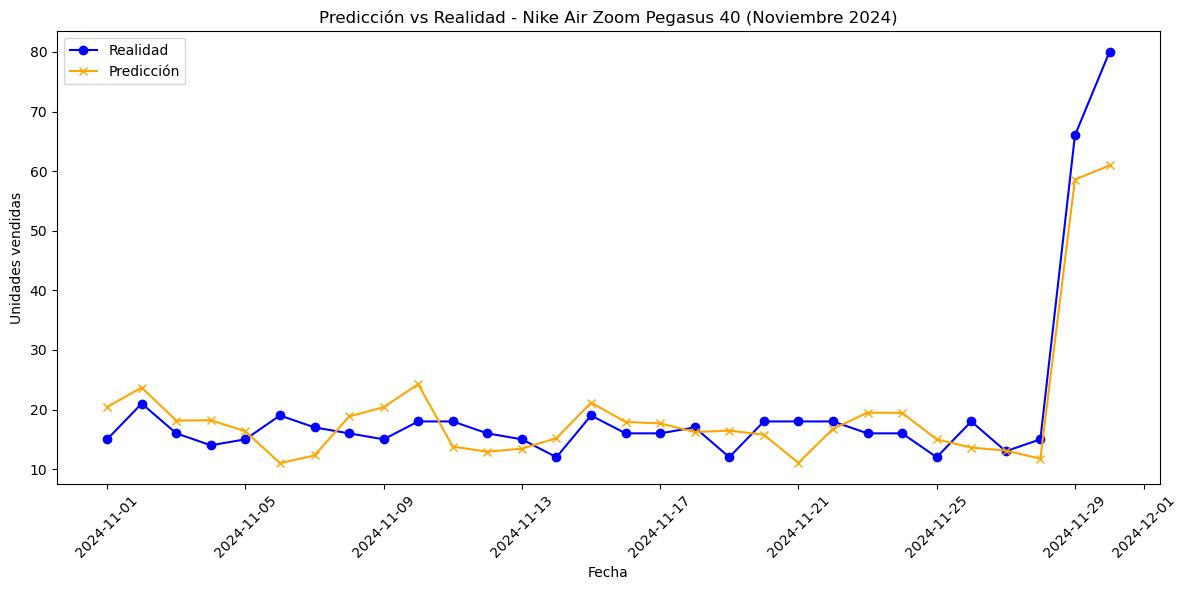

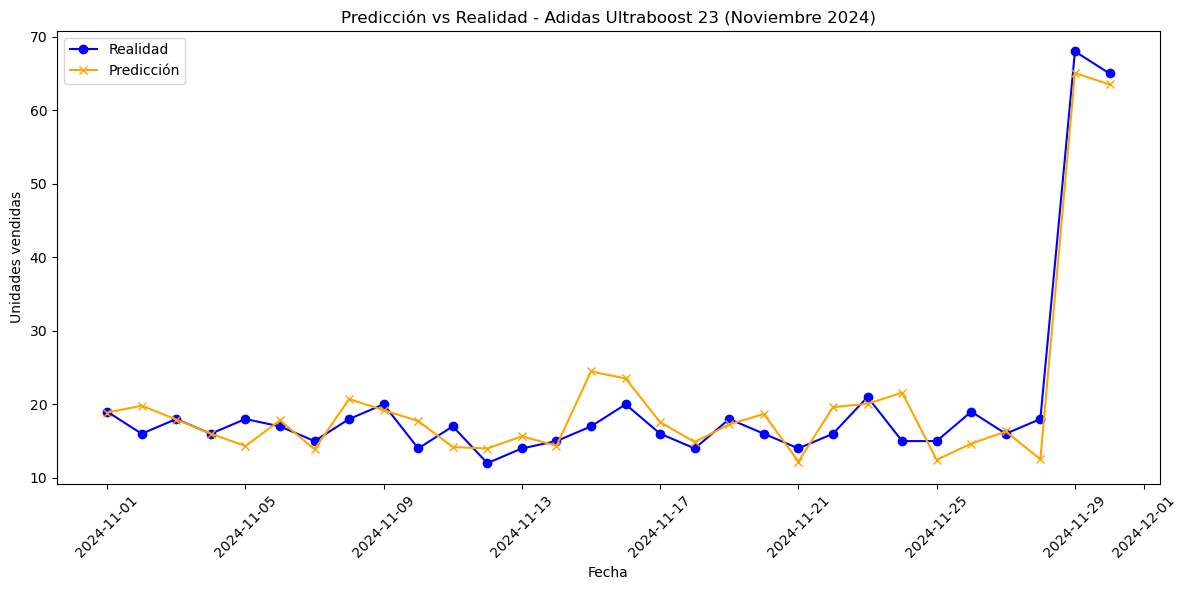

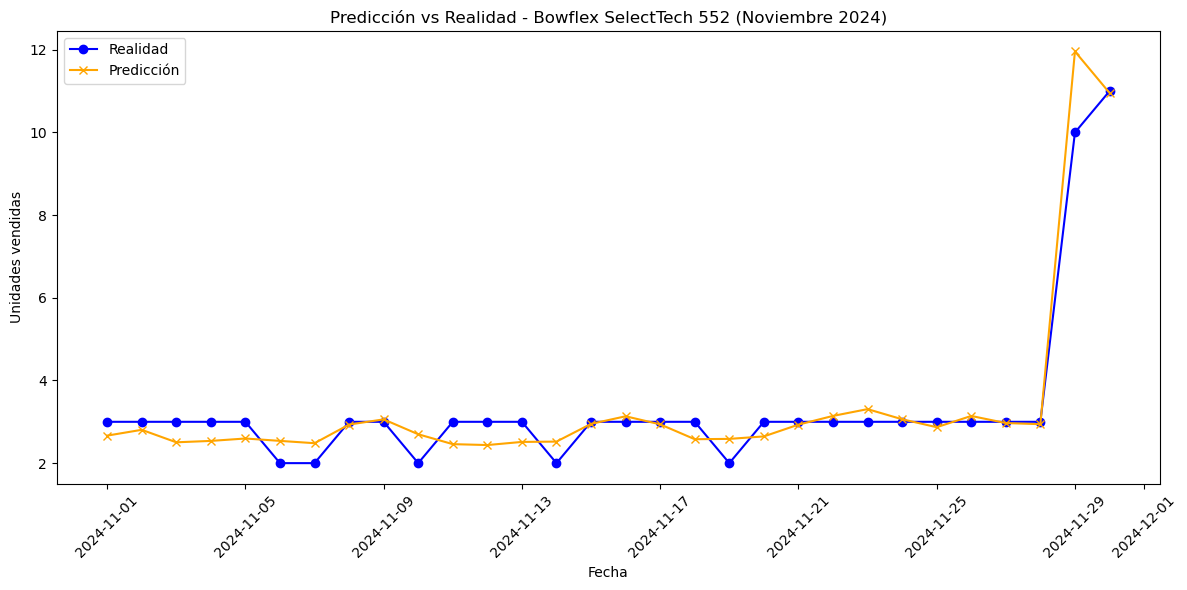

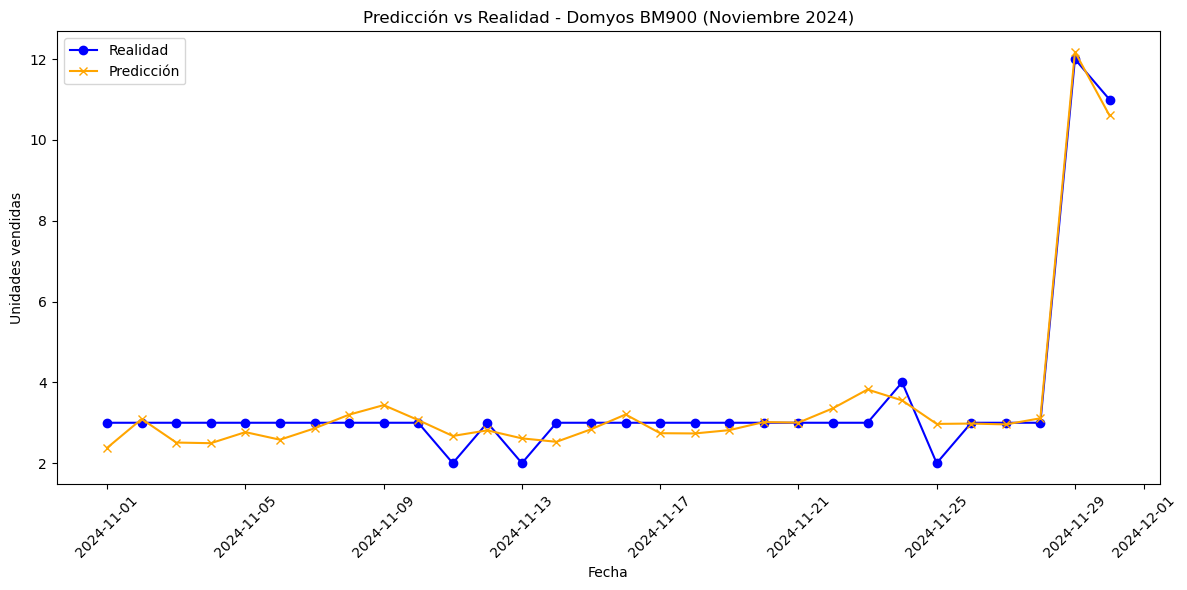

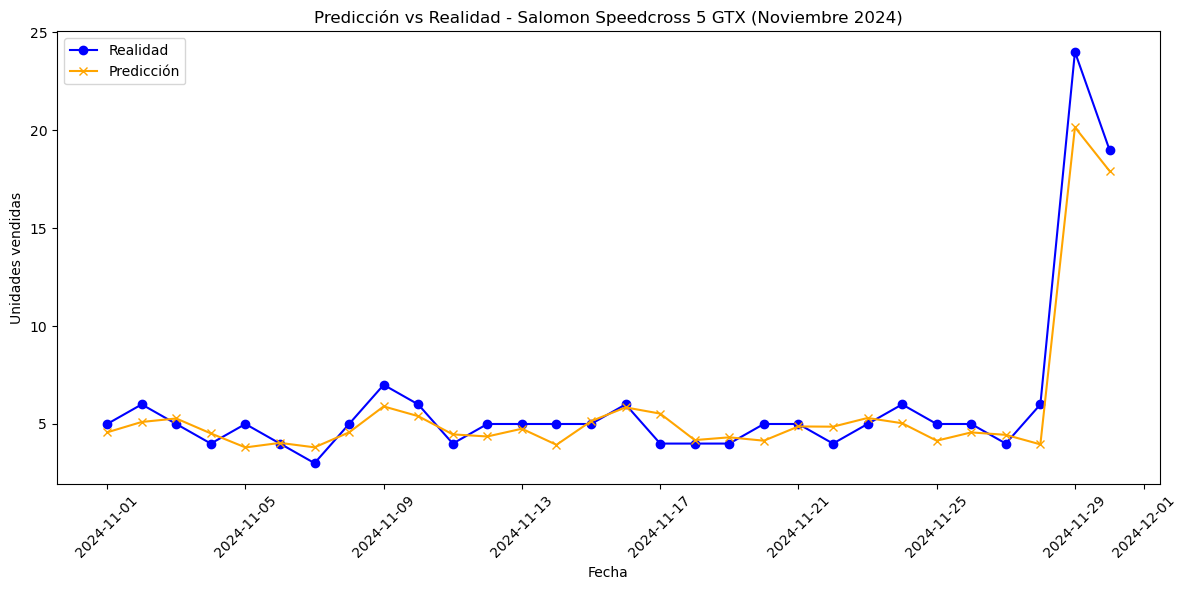

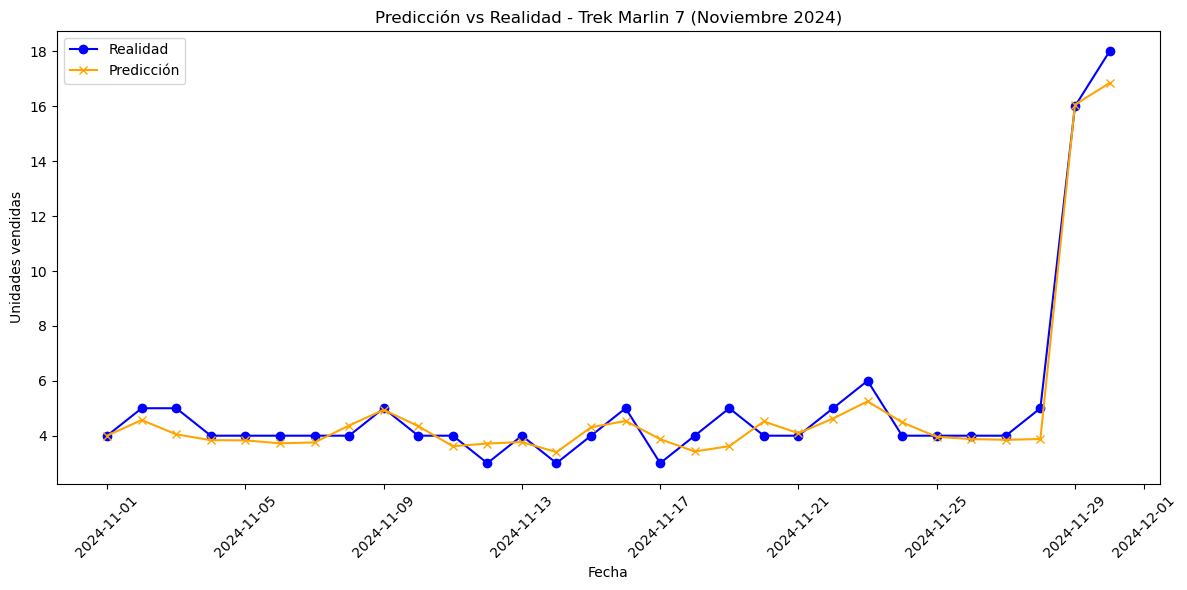

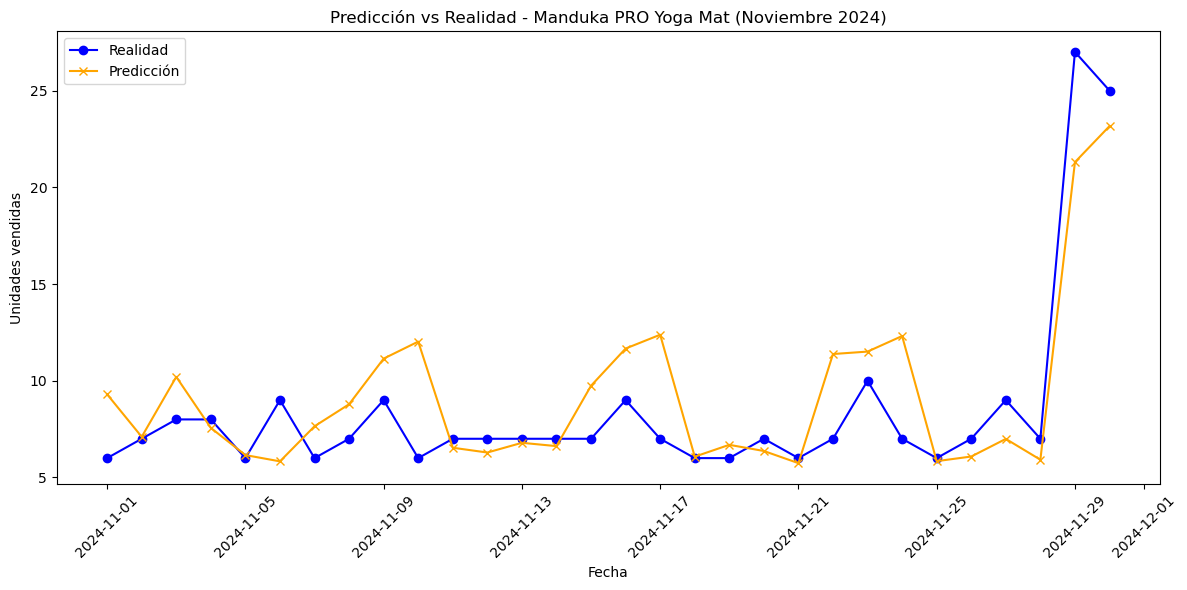

In [27]:
# 🤖 Predicción para noviembre 2024 de los 7 productos estrella y visualización
import matplotlib.pyplot as plt

# Filtrar noviembre 2024
nov_2024 = test_df[(test_df['año'] == 2024) & (test_df['mes'] == 11)]

# Seleccionar los 7 productos estrella
productos_estrella = nov_2024[nov_2024['es_estrella'] == True]['nombre'].unique()[:7]

for producto in productos_estrella:
    df_prod = nov_2024[nov_2024['nombre'] == producto].copy()
    X_prod = df_prod[X_cols]
    y_real = df_prod['unidades_vendidas']
    fechas = df_prod['fecha']
    y_pred = model.predict(X_prod)

    plt.figure(figsize=(12,6))
    plt.plot(fechas, y_real, label='Realidad', marker='o', color='blue')
    plt.plot(fechas, y_pred, label='Predicción', marker='x', color='orange')
    plt.title(f'Predicción vs Realidad - {producto} (Noviembre 2024)')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [28]:
# 🤖 Cálculo del MAE para cada producto estrella en noviembre 2024
from sklearn.metrics import mean_absolute_error

mae_productos = {}
for producto in productos_estrella:
    df_prod = nov_2024[nov_2024['nombre'] == producto].copy()
    X_prod = df_prod[X_cols]
    y_real = df_prod['unidades_vendidas']
    y_pred = model.predict(X_prod)
    mae = mean_absolute_error(y_real, y_pred)
    mae_productos[producto] = mae

print('MAE por producto estrella en noviembre 2024:')
for producto, mae in mae_productos.items():
    print(f'{producto}: {mae:.2f}')

MAE por producto estrella en noviembre 2024:
Nike Air Zoom Pegasus 40: 4.02
Adidas Ultraboost 23: 2.36
Bowflex SelectTech 552: 0.35
Domyos BM900: 0.32
Salomon Speedcross 5 GTX: 0.76
Trek Marlin 7: 0.44
Manduka PRO Yoga Mat: 1.94


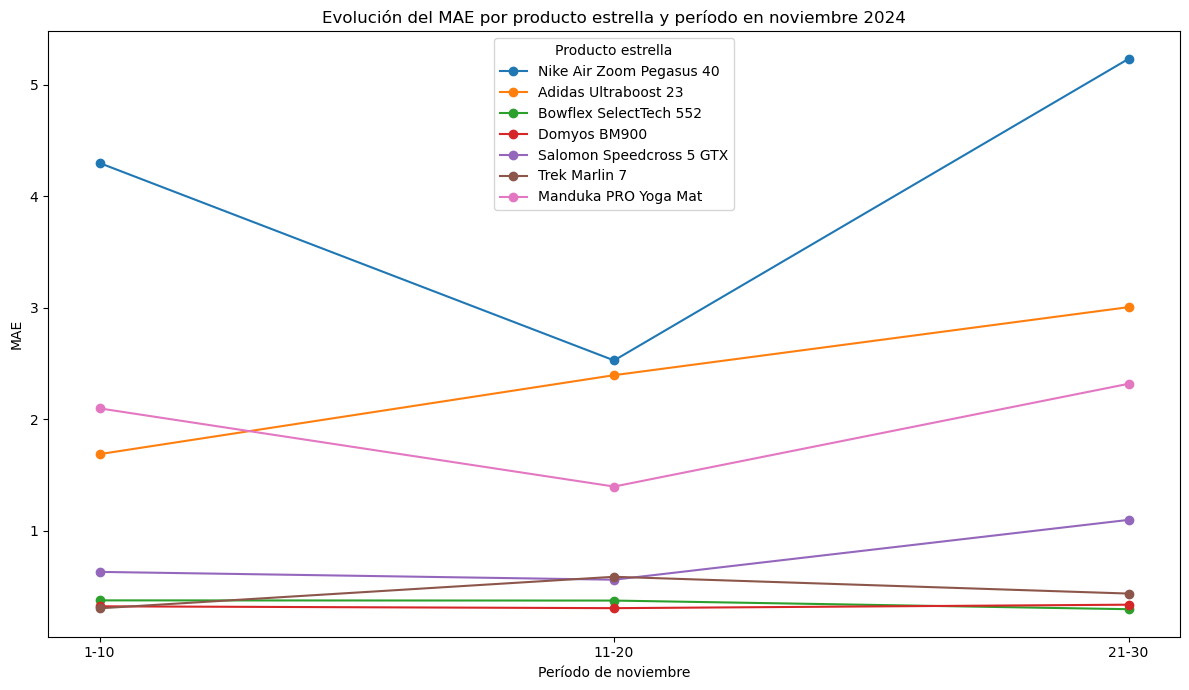

In [30]:
# 🤖 Evolución del MAE por producto estrella y período en noviembre 2024
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Crear columna de período en nov_2024
nov_2024 = nov_2024.copy()
nov_2024['periodo'] = pd.cut(nov_2024['dia'], bins=[0,10,20,31], labels=['1-10','11-20','21-30'])

mae_por_producto_periodo = {}
for producto in productos_estrella:
    maes = []
    for periodo in ['1-10','11-20','21-30']:
        df_pp = nov_2024[(nov_2024['nombre'] == producto) & (nov_2024['periodo'] == periodo)]
        if len(df_pp) == 0:
            maes.append(np.nan)
            continue
        X_pp = df_pp[X_cols]
        y_real_pp = df_pp['unidades_vendidas']
        y_pred_pp = model.predict(X_pp)
        mae_pp = mean_absolute_error(y_real_pp, y_pred_pp)
        maes.append(mae_pp)
    mae_por_producto_periodo[producto] = maes

# Graficar la evolución del MAE por producto estrella
plt.figure(figsize=(12,7))
periodos = ['1-10','11-20','21-30']
for producto, maes in mae_por_producto_periodo.items():
    plt.plot(periodos, maes, marker='o', label=producto)
plt.title('Evolución del MAE por producto estrella y período en noviembre 2024')
plt.xlabel('Período de noviembre')
plt.ylabel('MAE')
plt.legend(title='Producto estrella')
plt.tight_layout()
plt.show()

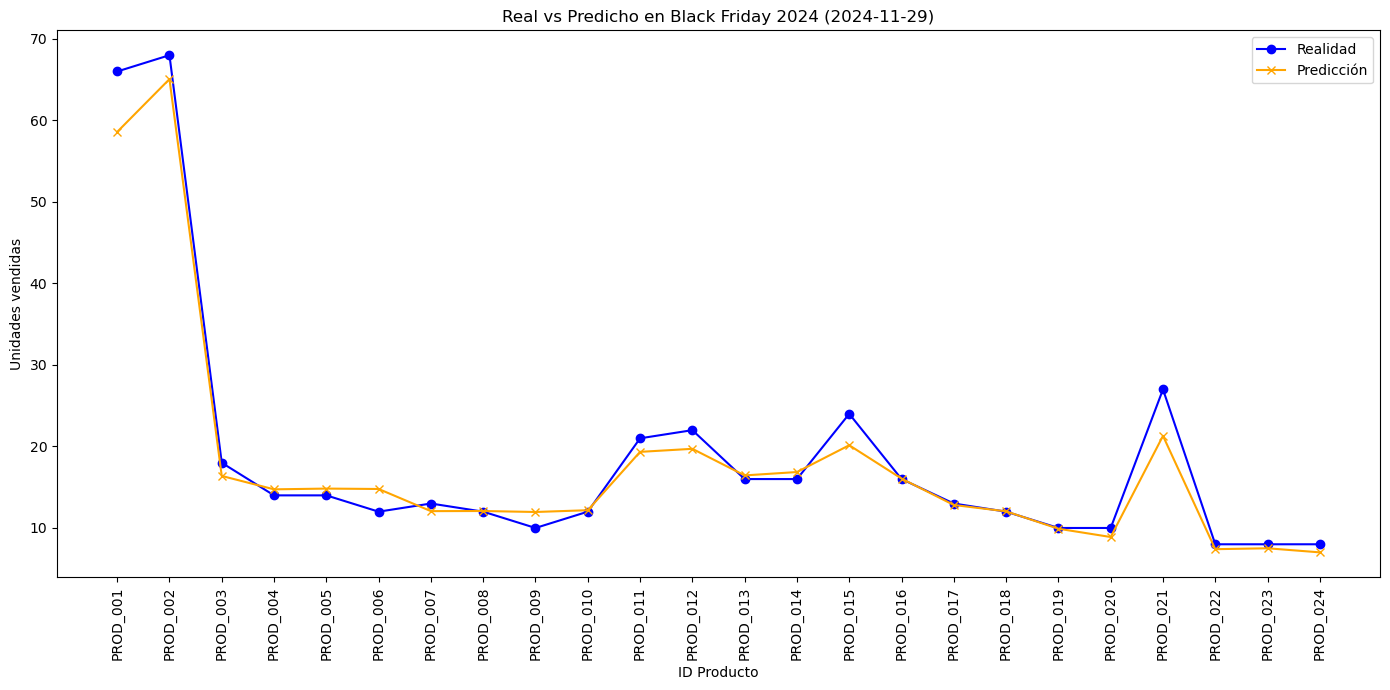

In [31]:
# 🤖 Análisis específico de Black Friday 2024: comparación real vs predicho para todos los productos
import matplotlib.pyplot as plt

# Filtrar el día de Black Friday 2024
bf_fecha = nov_2024[nov_2024['es_blackfriday']].fecha.unique()
if len(bf_fecha) > 0:
    bf_fecha = bf_fecha[0]
    df_bf = nov_2024[nov_2024['fecha'] == bf_fecha]
    X_bf = df_bf[X_cols]
    y_real_bf = df_bf['unidades_vendidas']
    y_pred_bf = model.predict(X_bf)
    producto_ids = df_bf['producto_id']
    plt.figure(figsize=(14,7))
    plt.plot(producto_ids, y_real_bf, label='Realidad', marker='o', color='blue')
    plt.plot(producto_ids, y_pred_bf, label='Predicción', marker='x', color='orange')
    plt.title(f'Real vs Predicho en Black Friday 2024 ({bf_fecha.date()})')
    plt.xlabel('ID Producto')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print('No se encontró registro de Black Friday en noviembre 2024.')

In [32]:
# 🤖 Reentrenamiento del modelo final con todos los datos históricos (2021-2024)
from sklearn.ensemble import HistGradientBoostingRegressor

# Usar df_lags completo como conjunto de entrenamiento
X_full = df_lags[X_cols]
y_full = df_lags['unidades_vendidas']

# Entrenar el modelo final con los mismos parámetros
modelo_final = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
modelo_final.fit(X_full, y_full)

print('Modelo final entrenado con todos los datos históricos (2021-2024).')

Modelo final entrenado con todos los datos históricos (2021-2024).


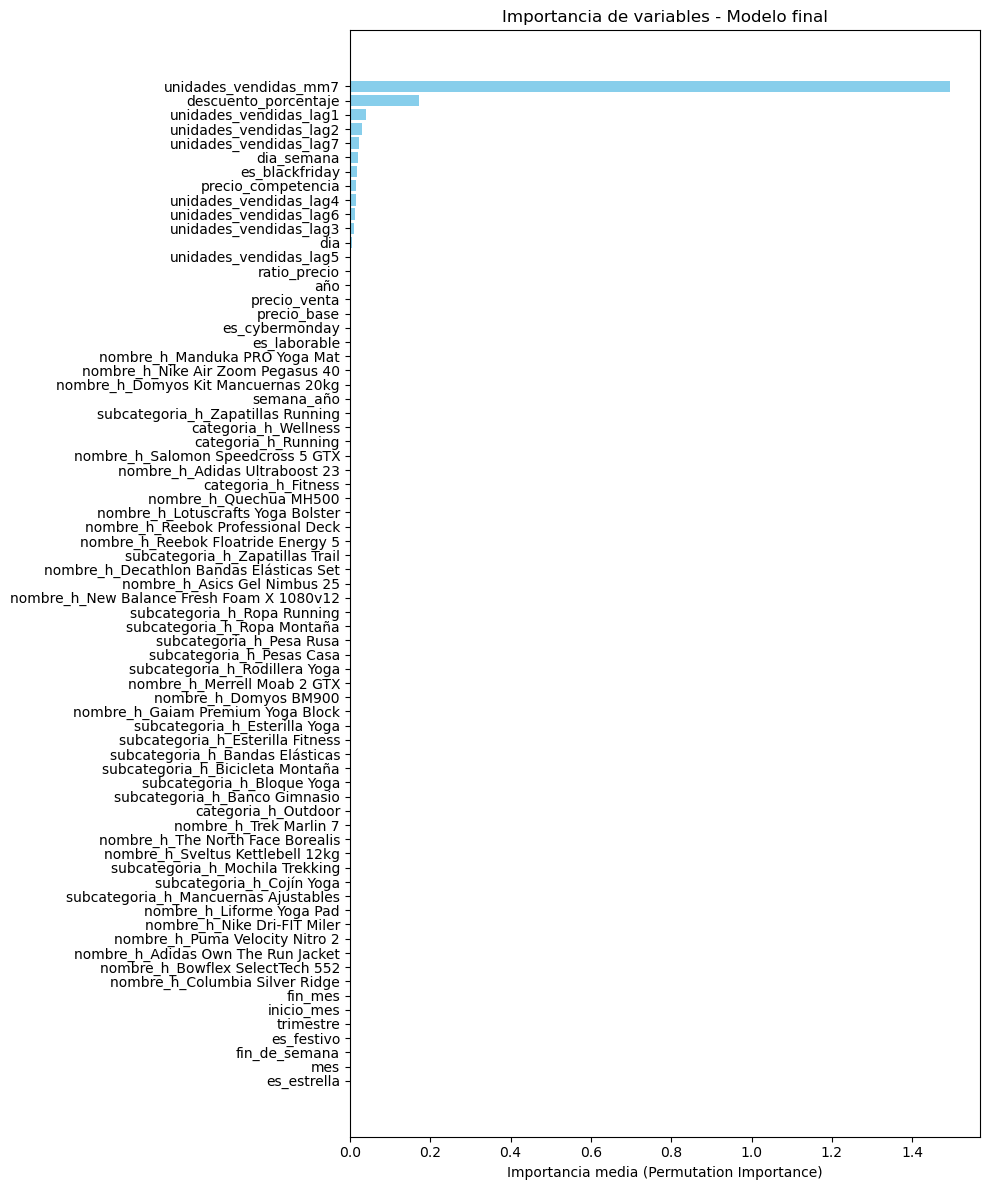

Modelo final guardado en ../models/modelo_final.joblib


In [33]:
# 🤖 Importancia de variables con permutation importance y guardado del modelo final
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# Calcular permutation importance
result = permutation_importance(modelo_final, X_full, y_full, n_repeats=10, random_state=42, n_jobs=-1)
importancias = result.importances_mean
indices = np.argsort(importancias)[::-1]
variables_ordenadas = [X_cols[i] for i in indices]
importancias_ordenadas = importancias[indices]

# Gráfico de barras horizontales ordenado
plt.figure(figsize=(10,12))
plt.barh(variables_ordenadas, importancias_ordenadas, color='skyblue')
plt.xlabel('Importancia media (Permutation Importance)')
plt.title('Importancia de variables - Modelo final')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Guardar el modelo final en la carpeta models
ruta_modelo = '../models/modelo_final.joblib'
joblib.dump(modelo_final, ruta_modelo)
print(f'Modelo final guardado en {ruta_modelo}')